## Project 3: A simple regression analysis on the Boston housing data
Muhammed Albayati
### Overview
In this project we are going to be apply some of data science research method skills.
### Concepts covered:
 
Data Science methodology\
Statistical research methods\
Statistical programming in Python
 
### The Boston Housing Dataset
Source : https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

### Attribute Information:

Input variables:
CRIM: Per capita crime rate by town\
ZN: Proportion of residential land zoned for lots over 25, 000 sq. ft\
INDUS: Proportion of non-retail business acres per town\
CHAS: Charles River dummy variable(=1 if tract bounds river 0 otherwise)\
NOX: Nitric oxide concentration(parts per 10 million)\
RM: Average number of rooms per dwelling\
AGE: Proportion of owner-occupied units built prior to 1940\
DIS: Weighted distances to five Boston employment centers\
RAD: Index of accessibility to radial highways\
PTRATIO:Pupil-teacher ratio by town\
B:1000(Bk — 0.63)², where Bk is the proportion of[people of African American descent] by town\
LSTAT: Percentage of lower status of the population\
MEDV: Median value of owner-occupied homes in $1000s

TAX: Full-value property tax rate per $10,000

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
boston_data = load_boston()

### some information about the keys below
data: contains the information for various houses\
target: prices of the house\
feature_names: names of the features\
DESCR: describes the dataset

In [2]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [3]:
# load the boston data to dataFrame
data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
data['MEDV'] = boston_data.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# rows and columns count 
data.shape

(506, 14)

In [5]:
# null counts
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
# use head function to dispaly first 5 rows and check to see if there is any categorical 
# values need to be converted to numeric values to convert categorical values to numeric values 
# we need to use something like this: pd.get_dummies(data,columns=['my_col1'])
# or we can use LabelEncoder
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Rename columns with clear names

In [7]:
col_names = ['CrimeRate', 'ZonedRatio', 'IndusRatio', 
             'AlongRiver', 'NO2Level', 'RoomsPerHouse',
             'OldHomeRatio', 'DisFromCenter', 'RoadAccessIndex',
             'PropTaxRate', 'PupilTeacherRatio', 'AfricanAmericanProportion', 'PercentageOfLowerStatusPopulation', 'MedianHouseValue']

In [8]:
data.columns = col_names
data.head()

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,AfricanAmericanProportion,PercentageOfLowerStatusPopulation,MedianHouseValue
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CrimeRate                          506 non-null    float64
 1   ZonedRatio                         506 non-null    float64
 2   IndusRatio                         506 non-null    float64
 3   AlongRiver                         506 non-null    float64
 4   NO2Level                           506 non-null    float64
 5   RoomsPerHouse                      506 non-null    float64
 6   OldHomeRatio                       506 non-null    float64
 7   DisFromCenter                      506 non-null    float64
 8   RoadAccessIndex                    506 non-null    float64
 9   PropTaxRate                        506 non-null    float64
 10  PupilTeacherRatio                  506 non-null    float64
 11  AfricanAmericanProportion          506 non-null    float64

In [10]:
data.describe().round(2)

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,AfricanAmericanProportion,PercentageOfLowerStatusPopulation,MedianHouseValue
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [11]:
rm_avg = data['RoomsPerHouse'].mean()
rm_avg

6.284634387351779

In [12]:
rm_std = data['RoomsPerHouse'].std()
rm_std

0.7026171434153233

In [13]:
# Corrolation data table
corr_df=data.corr().round(2)
corr_df

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,AfricanAmericanProportion,PercentageOfLowerStatusPopulation,MedianHouseValue
CrimeRate,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZonedRatio,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
IndusRatio,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
AlongRiver,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NO2Level,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RoomsPerHouse,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
OldHomeRatio,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DisFromCenter,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RoadAccessIndex,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
PropTaxRate,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [14]:
#1st way to find MedianHomeValue the highest positive and nagative corrolation variables
print("Highest positive :")
print(corr_df['MedianHouseValue'].nlargest(3))
print('---------------------')
print("Highest nagative :")
print(corr_df['MedianHouseValue'].nsmallest(3))

Highest positive :
MedianHouseValue    1.00
RoomsPerHouse       0.70
ZonedRatio          0.36
Name: MedianHouseValue, dtype: float64
---------------------
Highest nagative :
PercentageOfLowerStatusPopulation   -0.74
PupilTeacherRatio                   -0.51
IndusRatio                          -0.48
Name: MedianHouseValue, dtype: float64


<AxesSubplot:>

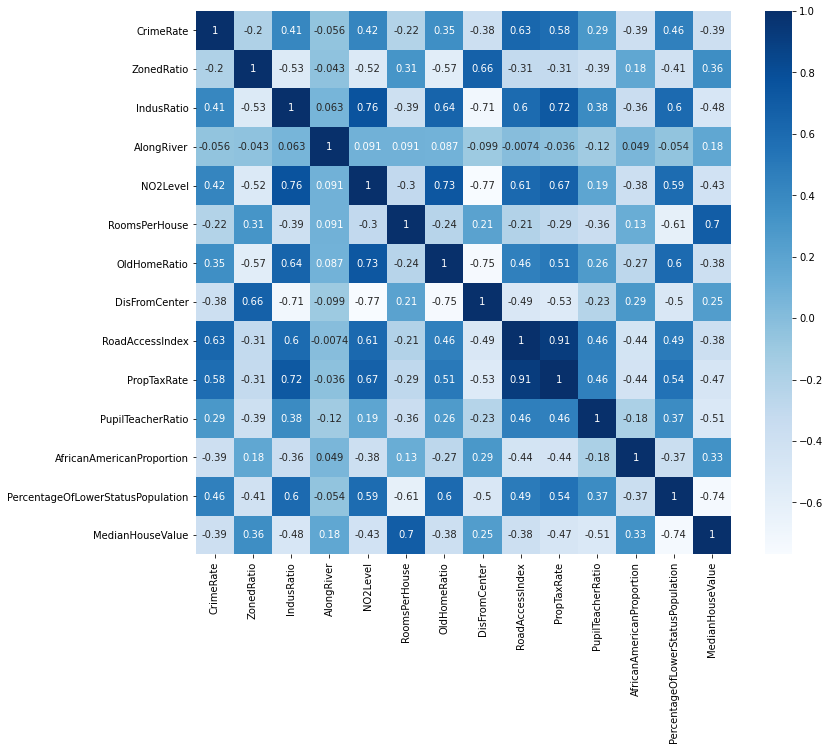

In [15]:
# 2nd way to find MEDV the highest positive and nagative corrolation variables
# we use the heatmap to measures the linear relationships betweeen MEDV and other variables.
# as you can see the highest postive correlation is number of rooms RM. also notice the nagarive correlation between AGE and MEDV.
# heatmap colors: YlGnBu, Blues, BuPu, Greens,PiYG
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap="Blues") 

### Selec the target label

In [16]:
x = data.drop('MedianHouseValue', axis=1)
y = data['MedianHouseValue']

In [17]:
# will use 80% to train our model and 20% for testing 
# If you don't mention the random_state in the code, then whenever you execute your code a new 
# random value is generated and the train and test datasets would have different values each time.
# However, if you use a particular value for random_state(random_state=1 or any other value) everytime 
# the result will be same, i.e, same values in train and test datasets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [18]:
x_train.shape,x_test.shape

((404, 13), (102, 13))

In [19]:
y_train.shape,y_test.shape

((404,), (102,))

In [20]:
# Normalization scales all numeric features to be between 0 and 1.
# having features in the same scale can vastly improve the performance of your ML Model.
# when normalize=True, trainx will be normalized by subtracting the mean and dividing by the l2-norm (according to sklearn).
# When normalize=False, trainx will remain as is.
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

## Training_score

In [21]:
# R-square is a measure of how well our linear model captures the underlying variation in our training data.
print("Training_score :",linear_model.score(x_train, y_train))

Training_score : 0.7292414535658933


In [22]:
predictors=x_train.columns
predictors

Index(['CrimeRate', 'ZonedRatio', 'IndusRatio', 'AlongRiver', 'NO2Level',
       'RoomsPerHouse', 'OldHomeRatio', 'DisFromCenter', 'RoadAccessIndex',
       'PropTaxRate', 'PupilTeacherRatio', 'AfricanAmericanProportion',
       'PercentageOfLowerStatusPopulation'],
      dtype='object')

In [23]:
# Nagative features that can reduce the price of house, and we can see that NOX 'Nitric oxide concentration' is
# the highest nagative feature could effect the price of houses.
# Positive features can increase the price of house.
coef=pd.Series(linear_model.coef_,predictors).sort_values()
print(coef)

NO2Level                            -15.903302
DisFromCenter                        -1.611048
PupilTeacherRatio                    -0.845041
PercentageOfLowerStatusPopulation    -0.594729
CrimeRate                            -0.115024
IndusRatio                           -0.038849
PropTaxRate                          -0.012573
OldHomeRatio                          0.007480
AfricanAmericanProportion             0.007912
ZonedRatio                            0.043501
RoadAccessIndex                       0.306424
AlongRiver                            2.017969
RoomsPerHouse                         3.206780
dtype: float64


In [24]:
#Prediction check
y_pred = linear_model.predict(x_test)
df_pred_actual=pd.DataFrame({'predicted':y_pred,'actual':y_test})
df_pred_actual.head(10).round(1)

,predicted,actual
170,22.4,17.4
375,25.0,15.0
438,4.5,8.4
297,18.6,20.3
19,19.4,18.2
208,22.7,24.4
59,21.3,19.6
200,29.8,32.9
13,20.4,20.4
313,26.2,21.6


### Testing_score

In [25]:
# Model testing score using r2_score
from sklearn.metrics import r2_score
print("Testing_score :",r2_score(y_test,y_pred))

Testing_score : 0.7628378948664143


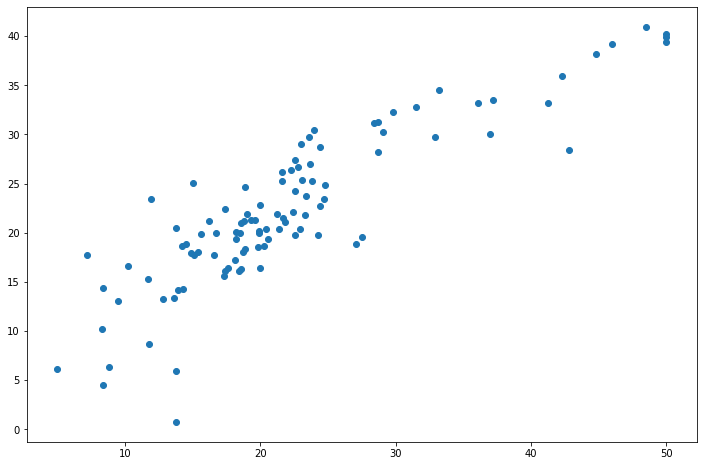

In [26]:
# You can also use a scatter plot to visualize actual price values against predicted values, and see how close they are clustered together. 
# The R-square score, of course, is an objective measure of your model, but visualizations give you a big picture feel for how your model works.
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.show()

In [27]:
# reset_index to start from 0
df_pred_actual_sample=df_pred_actual.sample(100)
df_pred_actual_sample=df_pred_actual_sample.reset_index()

### Actual versus predicted

In [28]:
df_pred_actual_sample.head().round(1)

,index,predicted,actual
0,188,32.3,29.8
1,15,20.2,19.9
2,144,8.7,11.8
3,208,22.7,24.4
4,135,17.2,18.1


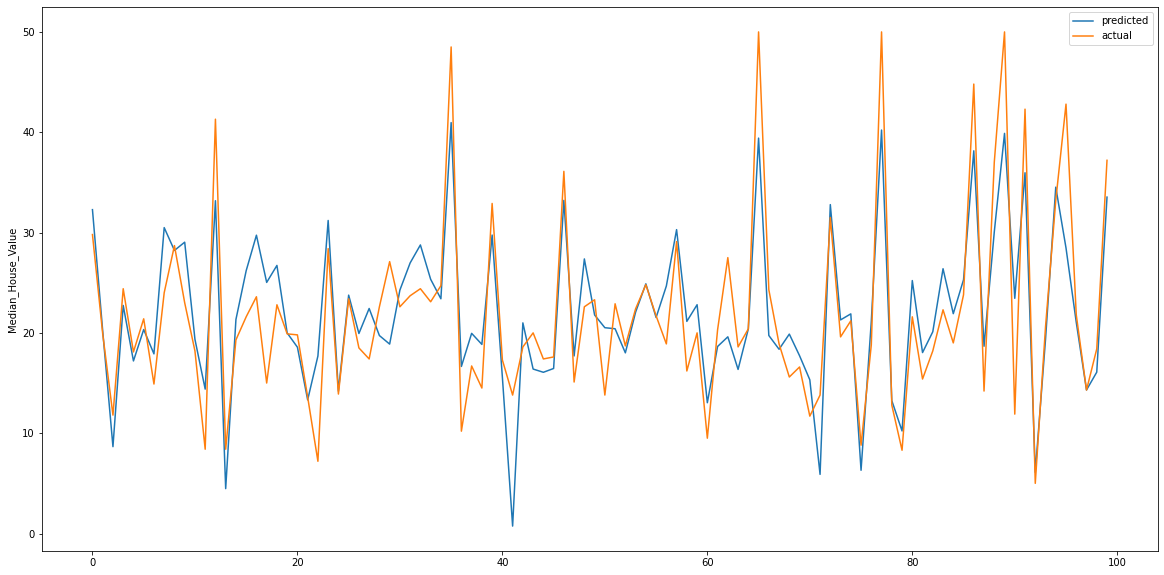

In [29]:
# here we plot actual versus predicted values using a line cahrt
plt.figure(figsize=(20,10))
plt.plot(df_pred_actual_sample['predicted'], label='predicted')
plt.plot(df_pred_actual_sample['actual'], label='actual')

plt.ylabel('Median_House_Value')
plt.legend()
plt.show()


In [31]:
# ## Adding new feature
# import random
# # print(random.randint(0,3))
# data['Park_distance']=data.apply(lambda data:random.randint(0,3),axis=1)
# data.head()